# Interpolation visualizer

### Parameters

In [39]:
N = 16      # Number of pixels by block
FRAC = 4    # Number of fractional pixels for interpolation (eg: 1/4 of resolution)
MODE = 0    # Select MC(0) or FME(1):
SEARCH = 2  # [Only for MC] Select Horizontal search(0), Vertical search(1) or Full search(2)
TAPS = 8    # Number of taps in the filter
I = 8       # Input size of the line 
S = 1       # Stride=1 means that the filter will deslocate 1 by 1 pixel at the time

### Filter coefficients

### Imports

In [40]:
import math
import numpy as np
from matplotlib import pyplot as plt

### Calculated parameters

In [41]:
# Calculating padding
PADDING = math.ceil((TAPS - 1) / 2) - 1

# Calculating one line size (considering a squared-block)
LINE = math.sqrt(N)

# Ensure that it results in an integer:
inteiro = (I - TAPS + 2*PADDING) / (S + 1)

print("Padding = ", PADDING)
print("Integer = ", inteiro)

Padding =  3
Integer =  3.0


### Basic setup

Matrix size:  19 x 19


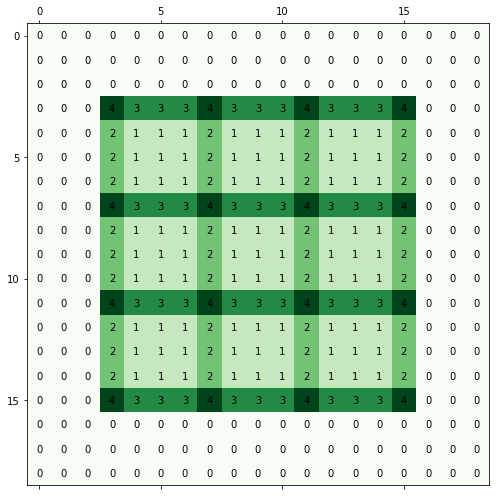

In [77]:
# Size of the ploted image 
plt.rcParams["figure.figsize"]=[7,7] 
plt.rcParams["figure.autolayout"]=True
fig, ax = plt.subplots()

# Size of the matrix max_val x max_val
max_val = int(LINE + 2*PADDING + (FRAC-1)*(LINE-1))   

# MATRIX[HORIZONTAL, VERTICAL]
matrix = np.zeros((max_val, max_val), dtype=np.uint8)

# The original pixels from the input block
for w in range(0,max_val-PADDING,FRAC):
    for h in range(0,max_val-PADDING,FRAC):
        matrix[PADDING+w, PADDING+h] = 4

# Horizontally interpolated pixels (1st pass)
for w in range(0,max_val-PADDING,FRAC):             # Loop to run between lines
    # for h in range(0,max_val-PADDING,FRAC):       # @bnagai: for padding only in left-superior sides
    for h in range(0,max_val-PADDING-FRAC,FRAC):    # Loop to run between columns        
        for f in range(0,FRAC-1,1):                 # Loop to print every padding space between integers
            matrix[PADDING+w, PADDING+h+1+f] = 3

# Vertically interpolated pixels (2nd pass)
for w in range(0,max_val-PADDING-FRAC,FRAC):        # Loop to run between lines
# for w in range(0,max_val-PADDING-FRAC,FRAC):      # @bnagai: for padding only in left-superior sides
    for h in range(0,max_val-PADDING,FRAC):         # Loop to run between columns
        for f in range(0,FRAC-1,1):                 # Loop to print every padding space between integers
            matrix[PADDING+1+w+f,PADDING+h] = 2

# Vertical and dependent interpolated pixels (2nd pass)
for w in range(0,max_val-PADDING-FRAC,FRAC):        # Loop to run between lines
    for h in range(1,max_val-PADDING-FRAC,1):       # Loop to run between columns
        if h%FRAC != 0:                             # Check if it isnt already filled
            for f in range(0,FRAC-1,1):             # Loop to print every padding space between integers
                matrix[PADDING+1+w+f,PADDING+h] = 1

# Define the colors of the pixels 
ax.matshow(matrix, cmap='Greens')

# Write the number of each pixel
for i in range(max_val):
    for j in range(max_val):
        c = matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

# Print the matriz
print('Matrix size: ', max_val, 'x', max_val)
plt.show()

### Trying interpolation with random values

#### Legend

 0 = Padding
 
 4 = Original pixels from block 

 3 = Horizontaly generated pixels in 1st pass

 2 = Verticaly generated pixels in 2nd pass
 
 1 = Dependent verticaly generated pixels in 2nd pass

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 
'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

## Motion Compensation (MC)

X and Y are the vectors generated for affine transformation.

Their format are fixed point ?

#### First case: X and Y components are integers

In [44]:
# Nothing to do, just foward the input

#### Second case: X or Y component is fractional

In [45]:
# Second test

#### Third case: X and Y components are fractional

## Fractional Motion Estimation (FME)